In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


cars = pd.read_csv('./dataset/CarPrice_Assignment.csv')

In [2]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
numeric_cols = cars.select_dtypes(include=['float64', 'int64']).columns
cars_numeric = cars[numeric_cols]


cars_numeric = cars_numeric.drop(['car_ID', 'symboling'], axis=1)

cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Padronização dos dados
scaler = StandardScaler()
cars_numeric_scaled = scaler.fit_transform(cars_numeric)

In [6]:
# Calculando a matriz de covariância
# cov_matrix = np.cov(cars_numeric_scaled, rowvar=False)

# Aplicando a SVD
U, S, V = np.linalg.svd(cars_numeric_scaled)

# Calculando a variância explicada
explained_variance_ratio = S**2 / np.sum(S**2)

print(U.shape)
print(S.shape)
print(V.shape)

(205, 205)
(14,)
(14, 14)


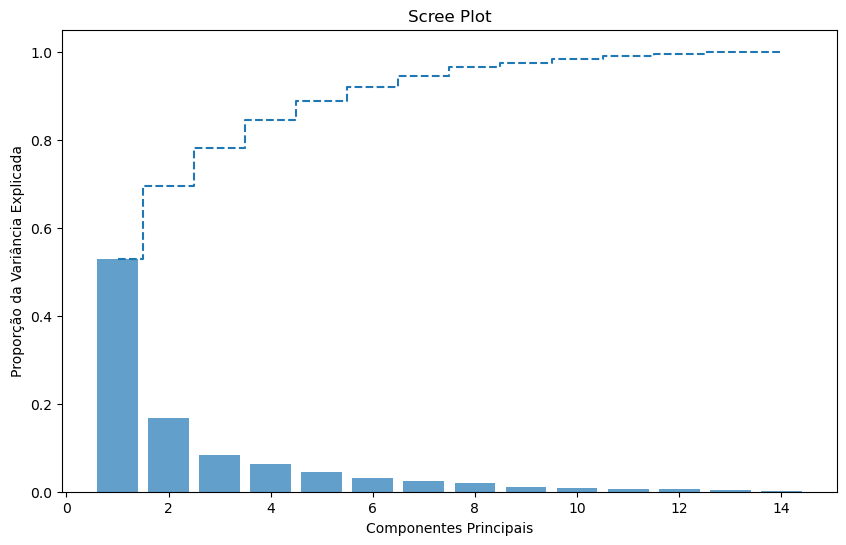

In [7]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.show()

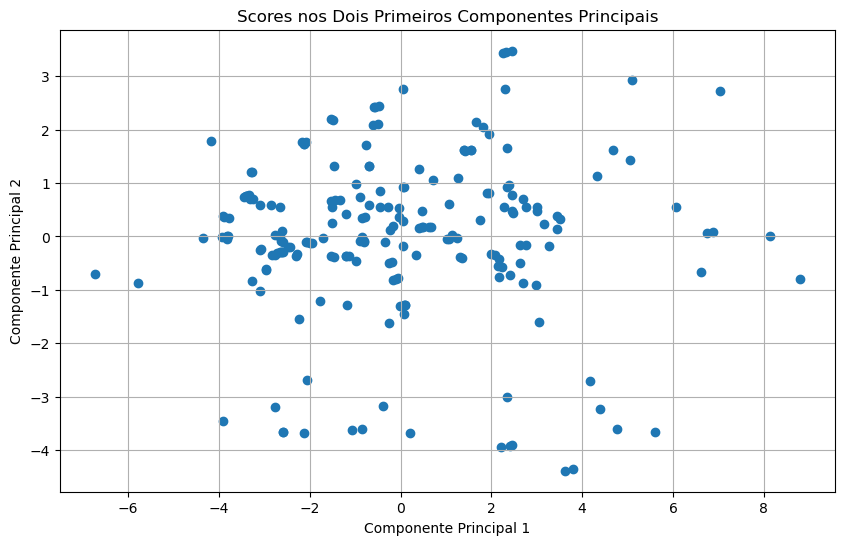

In [8]:
# Projeta os dados nos componentes principais
scores = np.dot(cars_numeric_scaled, V.T)

# Cria um gráfico de dispersão para os dois primeiros componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(scores[:, 0], scores[:, 1])
plt.title('Scores nos Dois Primeiros Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


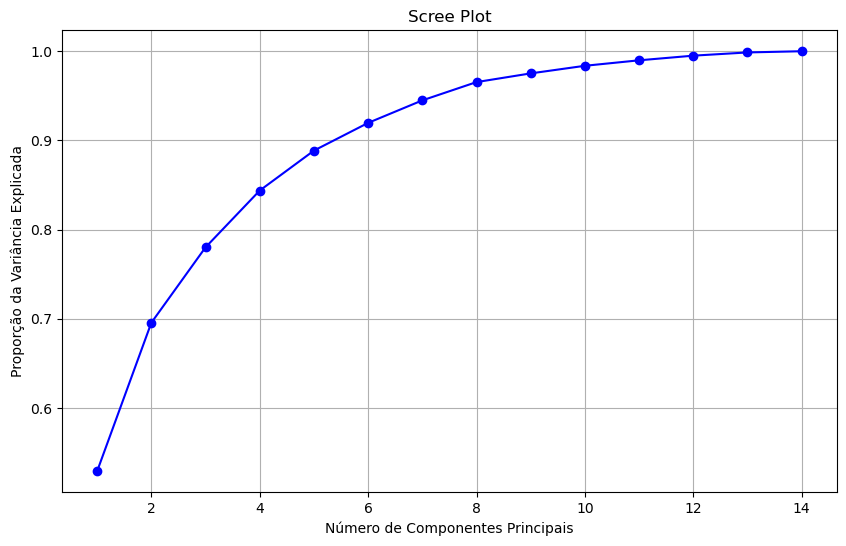

PC1 Variância Explicada: 0.5291
PC2 Variância Explicada: 0.1665
PC3 Variância Explicada: 0.0846
PC4 Variância Explicada: 0.0637
PC5 Variância Explicada: 0.0448
PC6 Variância Explicada: 0.0311
PC7 Variância Explicada: 0.0253
PC8 Variância Explicada: 0.0205
PC9 Variância Explicada: 0.0098
PC10 Variância Explicada: 0.0085
PC11 Variância Explicada: 0.0061
PC12 Variância Explicada: 0.0052
PC13 Variância Explicada: 0.0036
PC14 Variância Explicada: 0.0014


In [12]:
# Calcula a variancia acumuluada explicativa
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Cria um gráfico de Scree
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.grid(True)
plt.show()

# Printa as variâncias explicadas para cada componente principal
for i, explained_var in enumerate(explained_variance_ratio, start=1):
    print(f'PC{i} Variância Explicada: {explained_var:.4f}')


            Variavel  Carregamento PC1  Carregamento PC2
0          wheelbase          0.287584         -0.294486
1          carlength          0.329358         -0.167955
2           carwidth          0.327517         -0.100650
3          carheight          0.105286         -0.416908
4         curbweight          0.355160         -0.059002
5         enginesize          0.320851          0.047740
6          boreratio          0.263233          0.007746
7             stroke          0.052698         -0.103373
8   compressionratio          0.015143         -0.497817
9         horsepower          0.296141          0.297323
10           peakrpm         -0.076660          0.460890
11           citympg         -0.305366         -0.280814
12        highwaympg         -0.315191         -0.227819
13             price          0.320802          0.072243


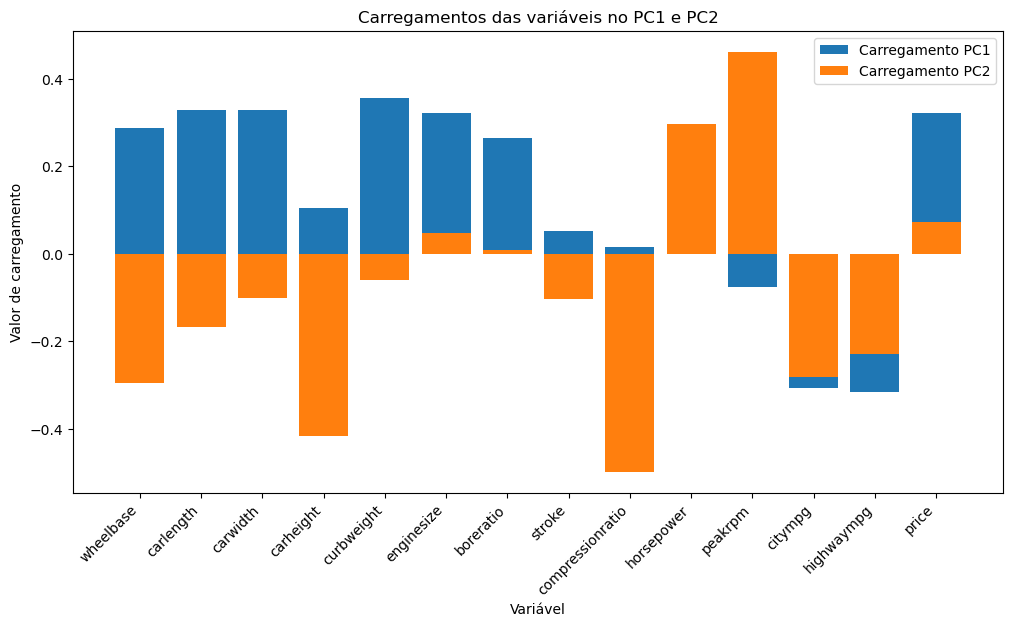

In [17]:
# Extract the loadings of each variable in the first two principal components
loadings_pc1 = V[0, :]
loadings_pc2 = V[1, :]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'Variavel': cars_numeric.columns, 'Carregamento PC1': loadings_pc1, 'Carregamento PC2': loadings_pc2})

# Print the loadings
print(loadings_df)

# Visualize the loadings
plt.figure(figsize=(12, 6))
plt.bar(loadings_df['Variavel'], loadings_df['Carregamento PC1'], label='Carregamento PC1')
plt.bar(loadings_df['Variavel'], loadings_df['Carregamento PC2'], label='Carregamento PC2')
plt.xlabel('Variável')
plt.ylabel('Valor de carregamento')
plt.title('Carregamentos das variáveis no PC1 e PC2')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()
